## Description

- Heart Disease UCI ([https://www.kaggle.com/ronitf/heart-disease-uci](https://www.kaggle.com/ronitf/heart-disease-uci))

Create a regression or classification deep learning model on Kaggle or your own dataset.
## Requirements
1. Do exploratory data analysis.
2. Do feature engineering.
3. Do feature preprocessing.
4. Build a deep learning model.
5. Compare the deep learning model with an alternative machine learning model.

## Bonus Points
- Explore your model results.
- Move your final model to a Python module.
- Do hyperparameter tuning.
- Deploy the model on your own machine.
- Deploy the model on external service.

## Definitions:

    age: age in years
    sex:sex (1 = male, 0 = female)
    cp:chest pain( 1: typical angina, 2= atypical angina, 3= non-anginal pain,4= asymptomatic)
    trestbps:resting blood pressure (mm Hg on admission to the hospital)
    chol:cholesterol measurement in mg/dl
    fbs:fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
    restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = probable or definite left ventricular hypertrophy)
    
    thalach:maximum heart rate 
    exang: Exercise induced angina (1 = yes; 0 = no)
    oldpeak: ST depression induced by exercise relative to rest ('ST'= positions on the ECG plot)
    slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
    ca: The number of major vessels (0-3)
    thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    target: Heart disease (0 = no, 1 = yes)
    
    
one hot encode -->sex, cp, fbs, restecg, exang, slope, 


In [2]:
import numpy as np
import seaborn as sns
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split ,RandomizedSearchCV,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.externals import joblib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib
RANDOM_STATE = 42

# do cross_validation



Using matplotlib backend: agg


In [40]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['cp'][df['cp']==1] ='typical angina'
df['cp'][df['cp']==2] ='atypical angina'
df['cp'][df['cp']==3] ='non-anginal pain'
df['cp'][df['cp']==4] ='asymptomatic'
df['fbs'][df['fbs']==0]='lower than 120mg/ml'
df['fbs'][df['fbs']==1]='greater than 120mg/ml'
df['restecg'][df['restecg'] == 0] = 'normal'
df['restecg'][df['restecg'] == 1] = 'ST-T wave abnormality'
df['restecg'][df['restecg'] == 2] = 'left ventricular hypertrophy'
df['exang'][df['exang'] == 0] = 'no'
df['exang'][df['exang'] == 1] = 'yes'
df['slope'][df['slope']==1]='upsloping'
df['slope'][df['slope']==2]='flat'
df['slope'][df['slope']==3]='downsloping'
df['thal'][df['thal']==3]='normal'
df['thal'][df['thal']==6]='fixed defect'
df['thal'][df['thal']==7]='reversable defect'





/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-p

In [41]:
df.dtypes

age           int64
sex          object
cp           object
trestbps      int64
chol          int64
fbs          object
restecg      object
thalach       int64
exang        object
oldpeak     float64
slope        object
ca            int64
thal         object
target        int64
dtype: object

In [2]:
tf.__version__

'2.0.0-beta1'

In [3]:
df = pd.read_csv('heart.csv',low_memory = False)

In [4]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [5]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

## Exploratory data analysis

/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


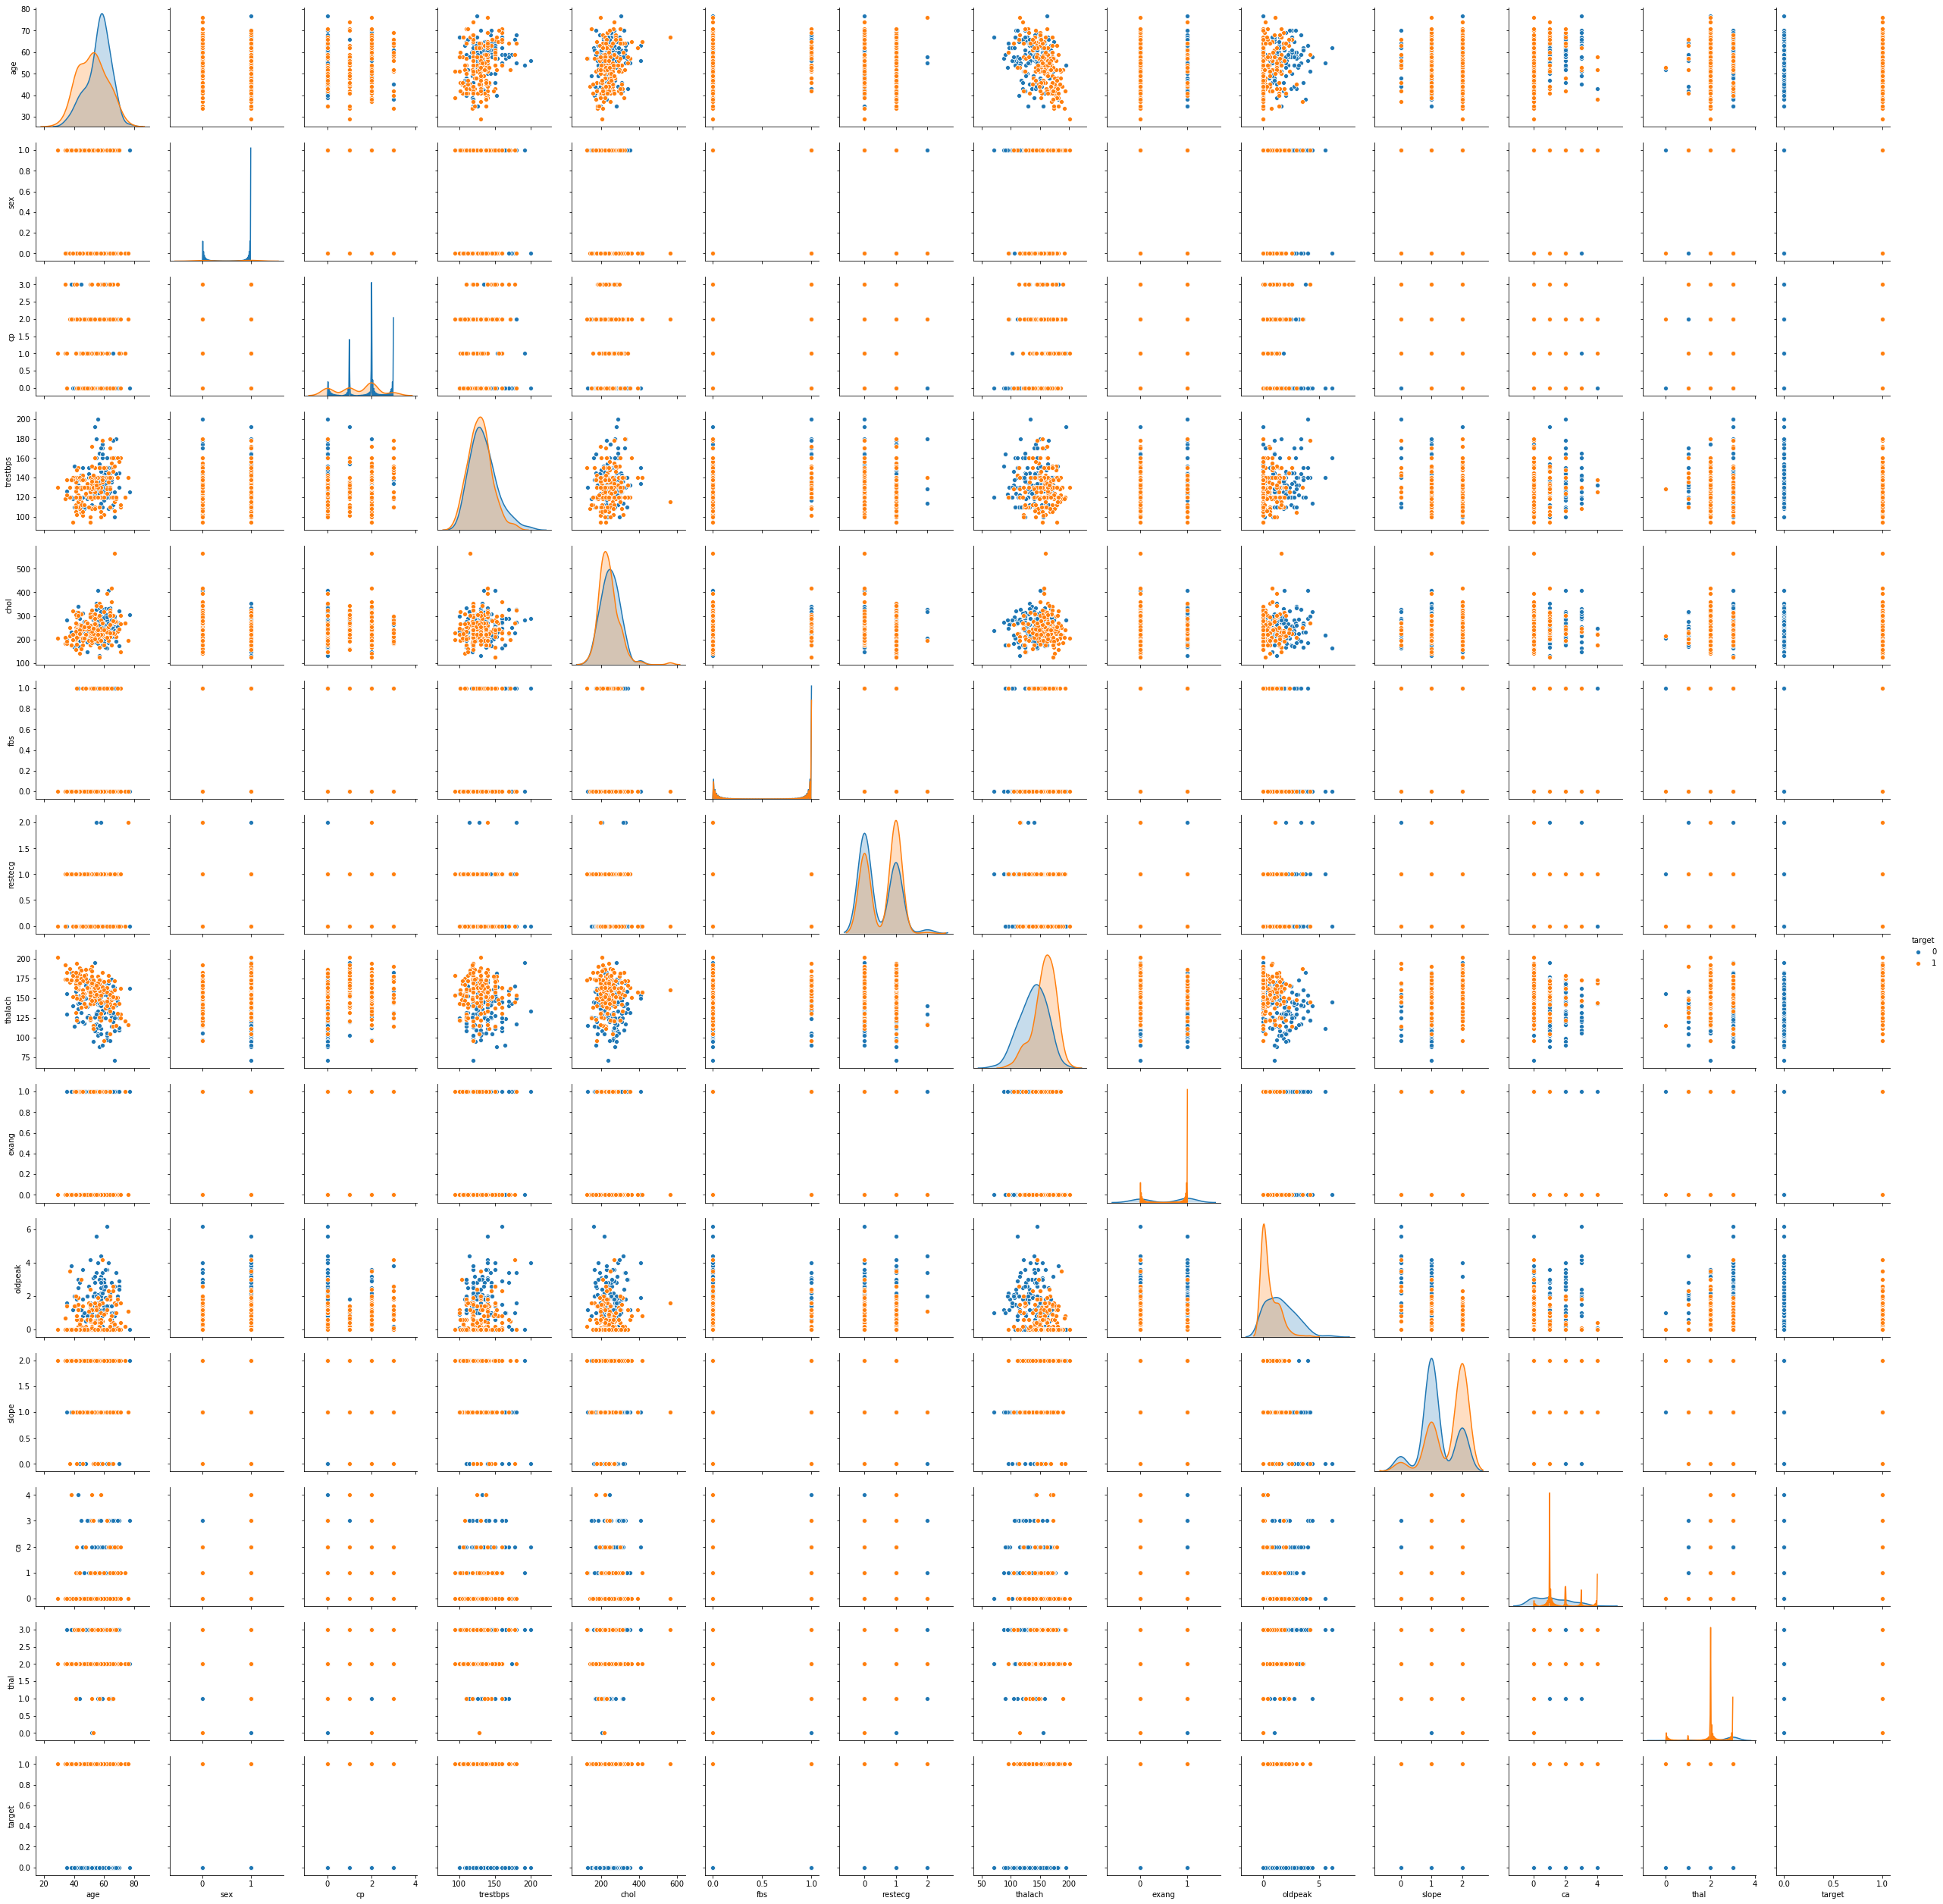

In [51]:
sns.pairplot(df,hue = 'target')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


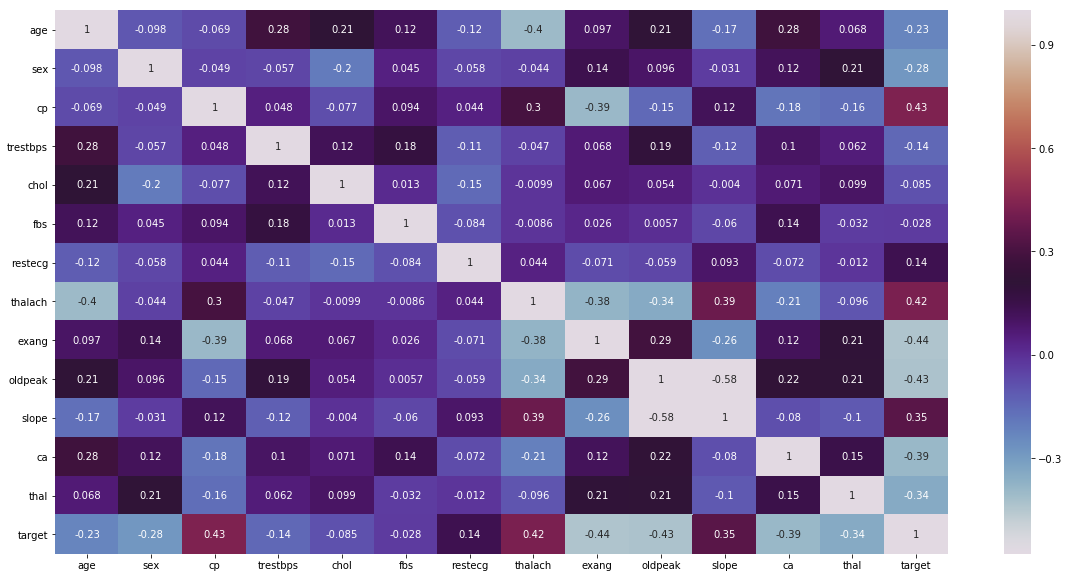

In [52]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='twilight')

df.corr()

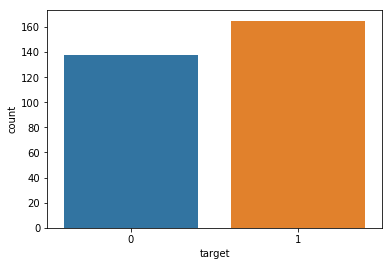

In [5]:
sns.countplot(x='target',data = df)


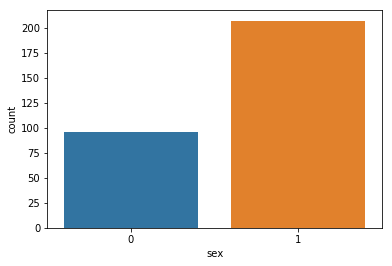

In [9]:
sns.countplot(x='sex', data=df)
plt.show()



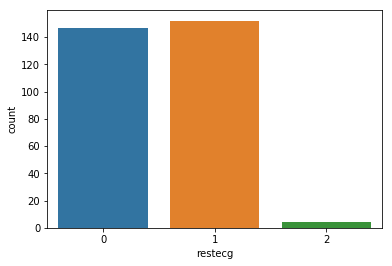

In [15]:
sns.countplot(x='restecg', data=df)
plt.show()

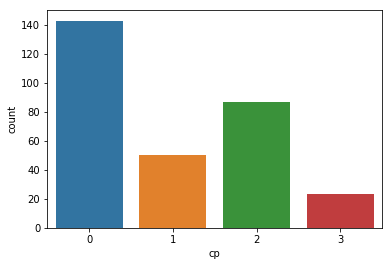

In [36]:
sns.countplot(x='cp', data=df)
plt.show()

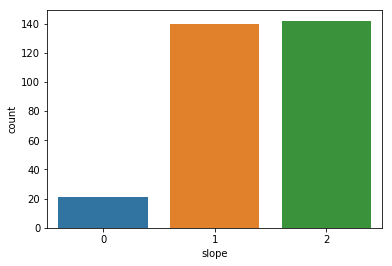

In [38]:
sns.countplot(x='slope', data=df)
plt.show()

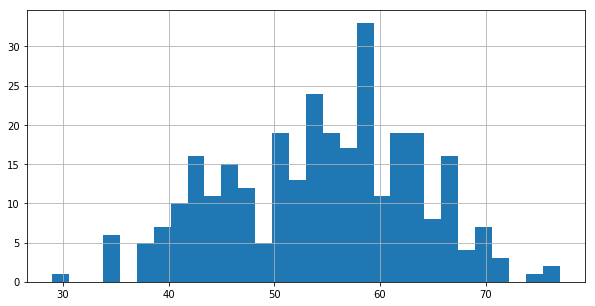

In [30]:
plt.figure(figsize=(10,5))
df['age'].hist(bins = 30)
plt.show()


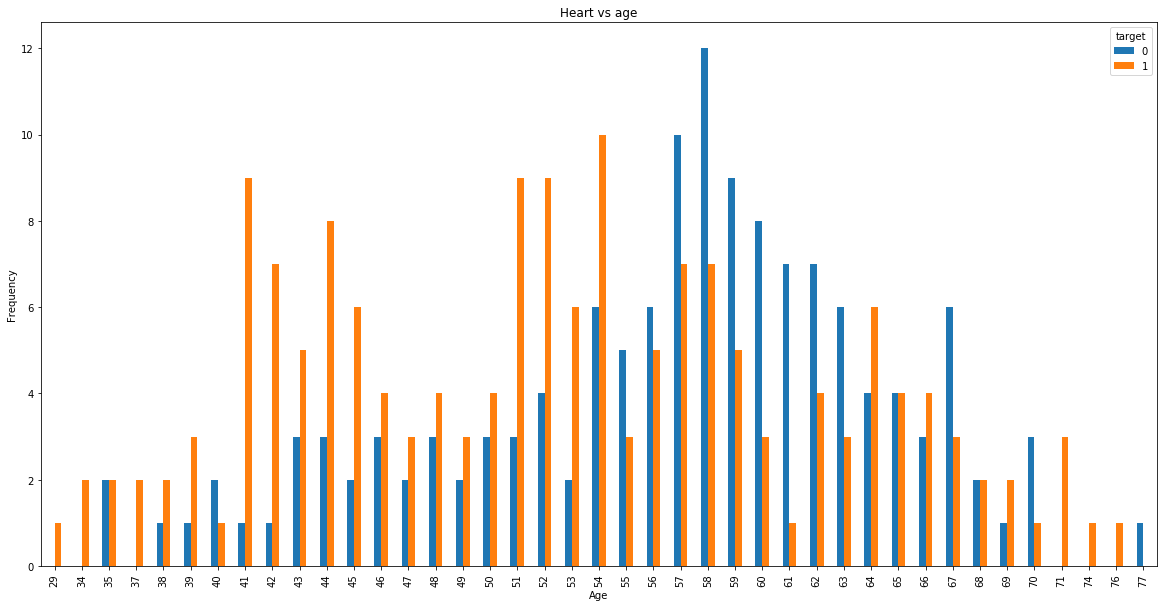

In [6]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,10))
plt.title('Heart vs age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



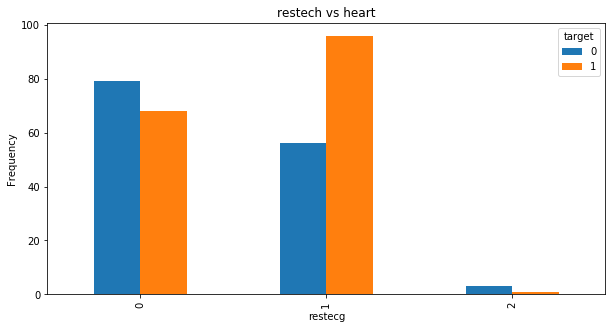

In [35]:
pd.crosstab(df.restecg,df.target).plot(kind="bar",figsize=(10,5))
plt.title('restech vs heart')
plt.xlabel('restecg')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 0, 'Age')

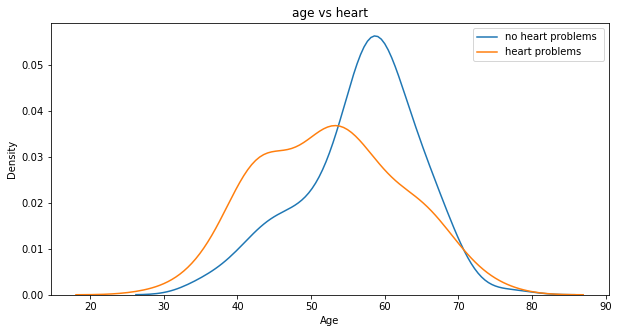

In [10]:
plt.figure(figsize = (10, 5))

df[['target', 'age']]
sns.kdeplot(df.loc[df['target'] == 0, 'age'], label = 'no heart problems ')
sns.kdeplot(df.loc[df['target'] == 1, 'age'], label = 'heart problems ')
plt.title('age vs heart')
plt.ylabel('Density')
plt.xlabel('Age')


Text(0.5, 1.0, 'age vs sex')

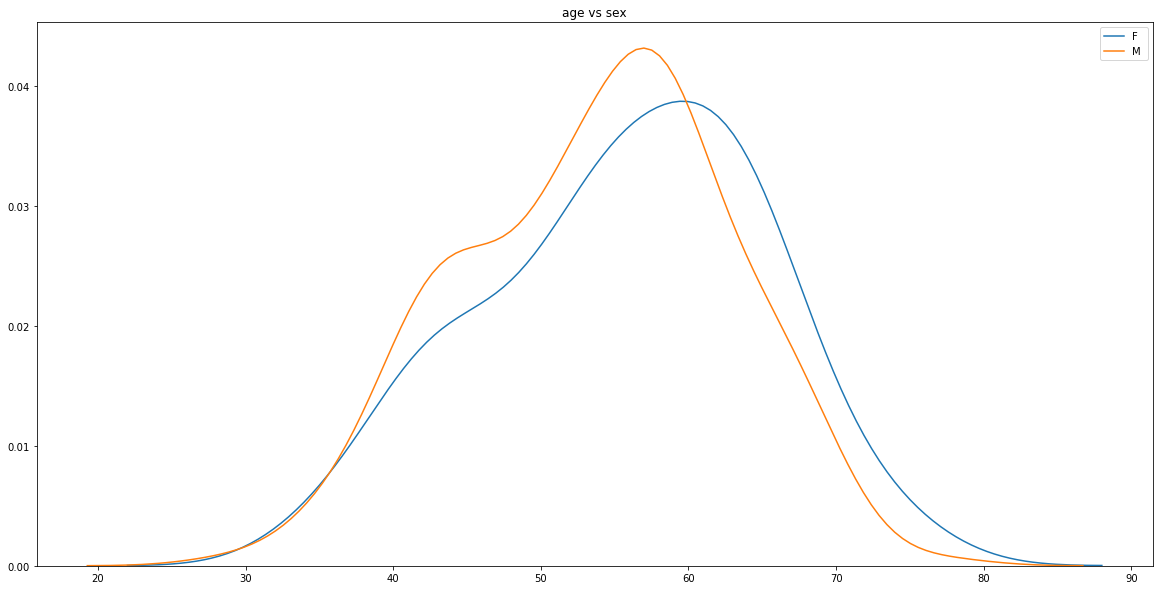

In [11]:
plt.figure(figsize = (20, 10))

df[['sex', 'age']]
sns.kdeplot(df.loc[df['sex'] == 0, 'age'], label = 'F ')
sns.kdeplot(df.loc[df['sex'] == 1, 'age'], label = 'M ')
plt.title('age vs sex')


restecg
0    AxesSubplot(0.125,0.125;0.775x0.755)
1    AxesSubplot(0.125,0.125;0.775x0.755)
2    AxesSubplot(0.125,0.125;0.775x0.755)
Name: target, dtype: object

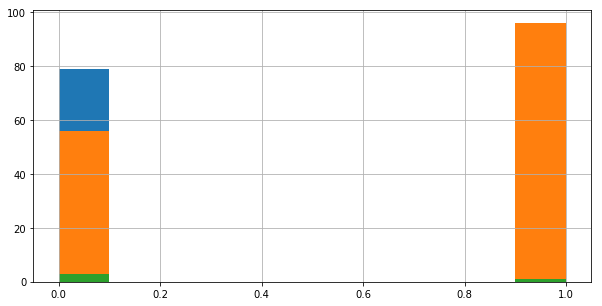

In [17]:
plt.figure(figsize = (10, 5))
df.groupby('restecg').target.hist()

Text(0.5, 1.0, 'target vs cp')

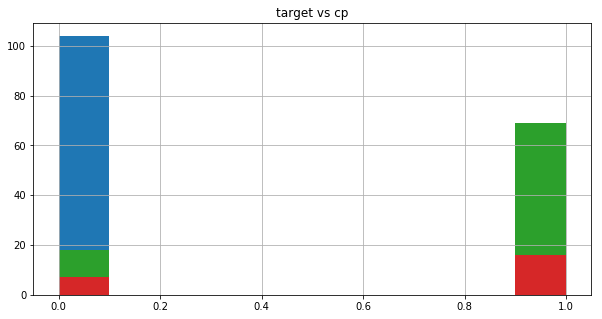

In [103]:
plt.figure(figsize = (10, 5))
df.groupby('cp').target.hist()
plt.title('target vs cp')

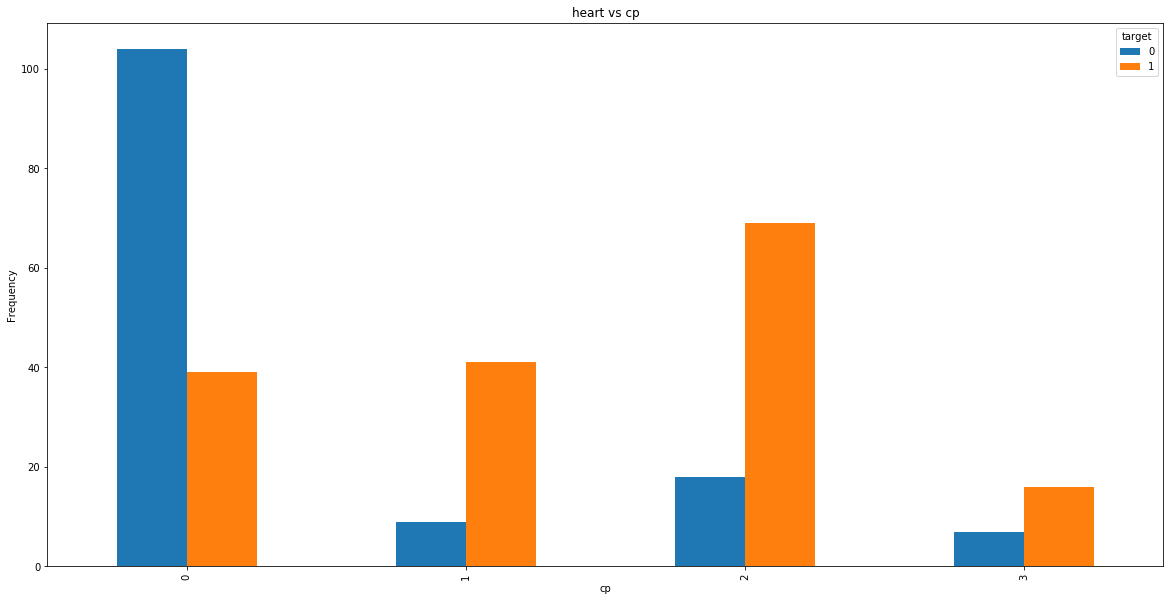

In [41]:
pd.crosstab(df.cp,df.target).plot(kind="bar",figsize=(20,10))
plt.title('heart vs cp')
plt.xlabel('cp')
plt.ylabel('Frequency')
plt.show()

Text(0, 0.5, 'thalach')

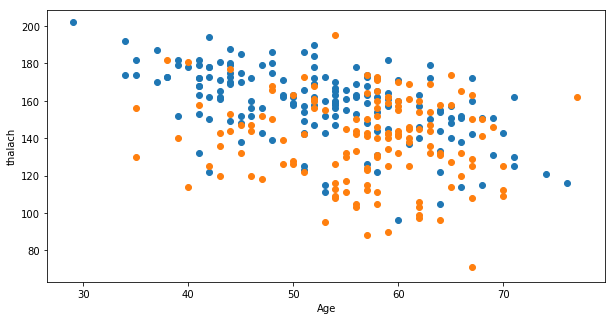

In [30]:
plt.figure(figsize=(10,5))
plt.scatter(x=df.age[df.target==1],y=df.thalach[df.target==1])
plt.scatter(x=df.age[df.target==0],y=df.thalach[df.target==0])
plt.xlabel('Age')
plt.ylabel('thalach')

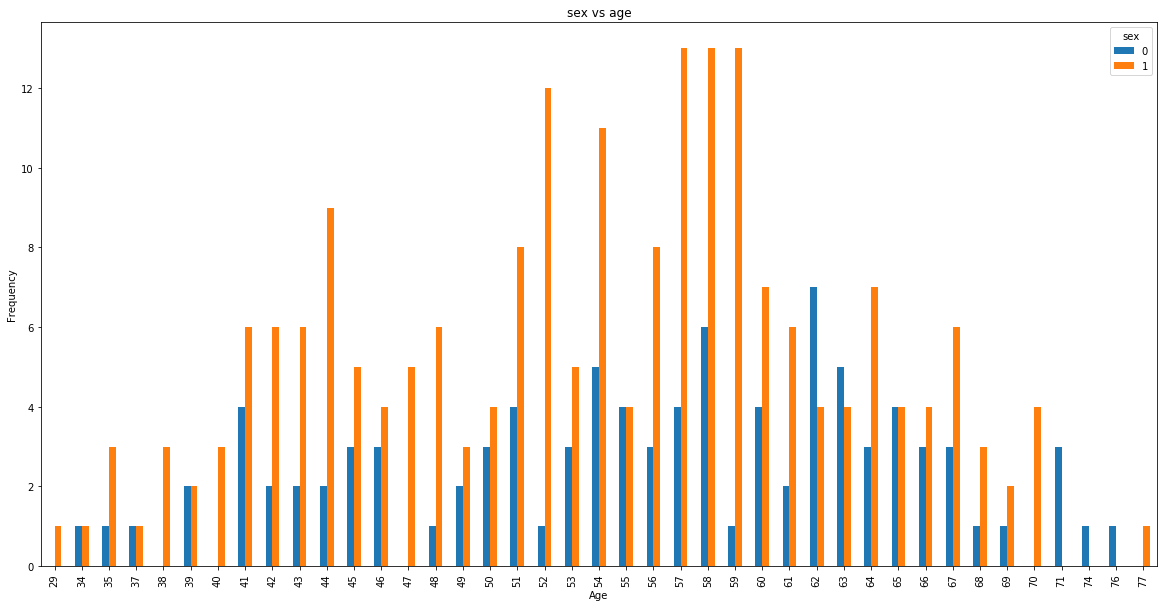

In [102]:
pd.crosstab(df.age,df.sex).plot(kind="bar",figsize=(20,10))
plt.title('sex vs age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Change categorical values



In [31]:
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'
df['cp'][df['cp']==1]='typical angina'



TypeError: Indexing a Series with DataFrame is not supported, use the appropriate DataFrame column

In [30]:
df['sex'].head()

0    male
1    male
2       0
3    male
4       0
Name: sex, dtype: object

## MODEL

In [4]:
scaler = StandardScaler()

In [5]:
scaled_features = scaler.fit_transform(df.drop('target',axis=1))

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
feature_columns = df.columns.to_list()
feature_columns.remove('target')

In [8]:
df_features = pd.DataFrame(scaled_features, columns = feature_columns)

In [9]:
df_features.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,0.952197,0.681005,1.973123,0.763956,-0.256334,2.394438,-1.005832,0.015443,-0.696631,1.087338,-2.274579,-0.714429,-2.148873
1,-1.915313,0.681005,1.002577,-0.092738,0.072199,-0.417635,0.898962,1.633471,-0.696631,2.122573,-2.274579,-0.714429,-0.512922
2,-1.474158,-1.468418,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,0.977514,-0.696631,0.310912,0.976352,-0.714429,-0.512922
3,0.180175,0.681005,0.032031,-0.663867,-0.198357,-0.417635,0.898962,1.239897,-0.696631,-0.206705,0.976352,-0.714429,-0.512922
4,0.290464,-1.468418,-0.938515,-0.663867,2.082050,-0.417635,0.898962,0.583939,1.435481,-0.379244,0.976352,-0.714429,-0.512922


In [10]:
df_features.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02,3.030000e+02
mean,4.690051e-17,-1.407015e-16,2.345026e-17,-7.035077e-16,-1.113887e-16,-2.345026e-17,1.465641e-16,-6.800574e-16,-4.690051e-17,2.345026e-17,-1.407015e-16,-2.345026e-17,-1.641518e-16
std,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00,1.001654e+00
min,-2.797624e+00,-1.468418e+00,-9.385146e-01,-2.148802e+00,-2.324160e+00,-4.176345e-01,-1.005832e+00,-3.439267e+00,-6.966305e-01,-8.968617e-01,-2.274579e+00,-7.144289e-01,-3.784824e+00
25%,-7.572802e-01,-1.468418e+00,-9.385146e-01,-6.638668e-01,-6.814943e-01,-4.176345e-01,-1.005832e+00,-7.061105e-01,-6.966305e-01,-8.968617e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
50%,6.988599e-02,6.810052e-01,3.203122e-02,-9.273778e-02,-1.210553e-01,-4.176345e-01,8.989622e-01,1.466343e-01,-6.966305e-01,-2.067053e-01,-6.491132e-01,-7.144289e-01,-5.129219e-01
75%,7.316189e-01,6.810052e-01,1.002577e+00,4.783913e-01,5.456738e-01,-4.176345e-01,8.989622e-01,7.151309e-01,1.435481e+00,4.834512e-01,9.763521e-01,2.650822e-01,1.123029e+00
max,2.496240e+00,6.810052e-01,1.973123e+00,3.905165e+00,6.140401e+00,2.394438e+00,2.803756e+00,2.289429e+00,1.435481e+00,4.451851e+00,9.763521e-01,3.203615e+00,1.123029e+00


In [11]:
train_data, test_data, train_labels, test_labels = train_test_split(df_features,df['target'],test_size = 0.3,random_state = RANDOM_STATE )

In [12]:
val_data, test_data,val_labels,test_labels =train_test_split(test_data, test_labels, test_size = 0.5,random_state = RANDOM_STATE)

In [13]:
def make_classifier(n_layers,layer_size,n_classes,final_activation, input_shape):
    layers = [tf.keras.layers.BatchNormalization(input_shape=input_shape)]
    for n in range(n_layers):
        layers.extend([
            tf.keras.layers.Dense(layer_size, kernel_initializer='he_uniform'), #linReg layer(Dense),kernel_initilializer =
            tf.keras.layers.LeakyReLU(),
            tf.keras.layers.BatchNormalization(),
        ])
        
    layers.append(tf.keras.layers.Dense(n_classes,activation = final_activation))
    return tf.keras.Sequential(layers)

In [14]:
dnnc = make_classifier(3, 32, 1, 'sigmoid',train_data.values.shape[1:])
dnnc1 = make_classifier(3, 32, 1, 'softmax',train_data.values.shape[1:])
dnnc2 = make_classifier(3, 32, 1, 'relu',train_data.values.shape[1:])

In [15]:
train_data.values.shape

(212, 13)

In [16]:

LR = 3e-3  #learning rate,depends ob batch size and data samples,use sci.notation
N_EPOCHS = 80 # 1 epoch = 1 iteration
BATCH_SIZE = 32

In [17]:

dnnc.compile(
    optimizer=tf.keras.optimizers.Adam(lr=LR), #opt 
    loss=tf.keras.losses.binary_crossentropy, # if binary classi. then b.crossenntropy  
    metrics=[
        tf.keras.metrics.BinaryAccuracy(),
        tf.keras.metrics.binary_accuracy,
        
    ]
)



In [52]:
dnnc.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_12 (Batc (None, 13)                52        
_________________________________________________________________
dense_12 (Dense)             (None, 32)                448       
_________________________________________________________________
leaky_re_lu_9 (LeakyReLU)    (None, 32)                0         
_________________________________________________________________
batch_normalization_13 (Batc (None, 32)                128       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1056      
_________________________________________________________________
leaky_re_lu_10 (LeakyReLU)   (None, 32)                0         
_________________________________________________________________
batch_normalization_14 (Batc (None, 32)               

In [21]:
train_data



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
124,-1.694735,-1.468418,1.002577,-2.148802,-0.913400,-0.417635,0.898962,1.283627,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
72,-2.797624,0.681005,0.032031,-0.092738,-0.816773,-0.417635,-1.005832,2.289429,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
15,-0.481558,-1.468418,1.002577,-0.663867,-0.526890,-0.417635,0.898962,0.365287,-0.696631,0.483451,-0.649113,-0.714429,-0.512922
10,-0.040403,0.681005,-0.938515,0.478391,-0.140381,-0.417635,0.898962,0.452748,-0.696631,0.138373,0.976352,-0.714429,-0.512922
163,-1.805024,0.681005,1.002577,0.364165,-1.377212,-0.417635,0.898962,1.021244,-0.696631,-0.896862,0.976352,3.203615,-0.512922
155,0.400752,-1.468418,-0.938515,-0.092738,-0.952051,-0.417635,0.898962,-0.815437,-0.696631,-0.379244,-0.649113,-0.714429,-0.512922
97,-0.260980,0.681005,-0.938515,-1.349222,-0.256334,2.394438,0.898962,-0.115749,-0.696631,-0.810592,0.976352,2.224104,1.123029
68,-1.143291,0.681005,0.032031,-0.663867,-0.507565,-0.417635,0.898962,0.890053,-0.696631,-0.896862,0.976352,-0.714429,-0.512922
229,1.062485,0.681005,1.002577,-0.378302,1.212403,-0.417635,0.898962,-0.815437,1.435481,0.655990,-0.649113,-0.714429,1.123029
37,-0.040403,0.681005,1.002577,1.049520,-0.275659,-0.417635,-1.005832,0.671400,-0.696631,0.483451,0.976352,-0.714429,1.123029


In [100]:
dnnc.fit(
    x=train_data.values,
    y=train_labels.values,
    validation_data=(val_data.values,val_labels.values),
    batch_size=BATCH_SIZE,
    epochs=N_EPOCHS,
    shuffle = True
)

Train on 212 samples, validate on 45 samples
Epoch 1/80
212/212 [==============================] - 0s 268us/sample - loss: 0.0647 - binary_accuracy: 0.9811 - val_loss: 0.6786 - val_binary_accuracy: 0.8444
Epoch 2/80
212/212 [==============================] - 0s 324us/sample - loss: 0.0606 - binary_accuracy: 0.9717 - val_loss: 0.4979 - val_binary_accuracy: 0.8000
Epoch 3/80
212/212 [==============================] - 0s 333us/sample - loss: 0.0258 - binary_accuracy: 0.9953 - val_loss: 0.5066 - val_binary_accuracy: 0.8444
Epoch 4/80
212/212 [==============================] - 0s 317us/sample - loss: 0.0287 - binary_accuracy: 0.9953 - val_loss: 0.6554 - val_binary_accuracy: 0.8222
Epoch 5/80
212/212 [==============================] - 0s 315us/sample - loss: 0.0539 - binary_accuracy: 0.9811 - val_loss: 0.7736 - val_binary_accuracy: 0.8000
Epoch 6/80
212/212 [==============================] - 0s 311us/sample - loss: 0.0561 - binary_accuracy: 0.9811 - val_loss: 0.7131 - val_binary_accuracy: 0.

Epoch 52/80
212/212 [==============================] - 0s 311us/sample - loss: 0.0239 - binary_accuracy: 0.9953 - val_loss: 0.6002 - val_binary_accuracy: 0.8222
Epoch 53/80
212/212 [==============================] - 0s 281us/sample - loss: 0.0101 - binary_accuracy: 1.0000 - val_loss: 0.5660 - val_binary_accuracy: 0.8222
Epoch 54/80
212/212 [==============================] - 0s 308us/sample - loss: 0.0309 - binary_accuracy: 0.9906 - val_loss: 0.6094 - val_binary_accuracy: 0.8444
Epoch 55/80
212/212 [==============================] - 0s 285us/sample - loss: 0.0067 - binary_accuracy: 1.0000 - val_loss: 0.5930 - val_binary_accuracy: 0.8000
Epoch 56/80
212/212 [==============================] - 0s 289us/sample - loss: 0.0654 - binary_accuracy: 0.9717 - val_loss: 0.6488 - val_binary_accuracy: 0.7778
Epoch 57/80
212/212 [==============================] - 0s 288us/sample - loss: 0.0166 - binary_accuracy: 0.9906 - val_loss: 0.7043 - val_binary_accuracy: 0.8222
Epoch 58/80
212/212 [=============

In [95]:
test_predictions = dnnc.predict(test_data.values)

In [96]:
test_predictions

array([[9.33462381e-03],
       [4.45355356e-01],
       [9.29750919e-01],
       [1.43578053e-02],
       [9.99507129e-01],
       [9.99582648e-01],
       [9.99938190e-01],
       [1.19209290e-07],
       [1.78813934e-07],
       [9.74794149e-01],
       [9.99999762e-01],
       [1.97784424e-01],
       [9.99168992e-01],
       [1.02549791e-04],
       [9.92712021e-01],
       [9.99945402e-01],
       [1.00000000e+00],
       [7.94410706e-04],
       [0.00000000e+00],
       [1.22964382e-04],
       [2.17590332e-02],
       [3.68535519e-04],
       [9.85863566e-01],
       [9.50839162e-01],
       [9.99561906e-01],
       [9.25621033e-01],
       [9.99889374e-01],
       [5.69266081e-01],
       [3.87430191e-07],
       [9.25660133e-04],
       [7.53092766e-03],
       [3.32742929e-04],
       [2.40203738e-03],
       [2.49257684e-03],
       [9.98616338e-01],
       [9.51290131e-05],
       [3.25109363e-01],
       [9.71558809e-01],
       [9.99999642e-01],
       [1.68645680e-02],


In [97]:
THRESHOLD = 0.5

In [98]:
print(confusion_matrix(test_labels,test_predictions > THRESHOLD))

[[29 12]
 [14 36]]


In [99]:
print(classification_report(test_labels,test_predictions > THRESHOLD))

              precision    recall  f1-score   support

           0       0.67      0.71      0.69        41
           1       0.75      0.72      0.73        50

   micro avg       0.71      0.71      0.71        91
   macro avg       0.71      0.71      0.71        91
weighted avg       0.72      0.71      0.71        91



In [ ]:
dnnc.save('dnnc.h5')

## Random forest

In [28]:
train_data_cv = pd.concat([train_data,val_data],axis =0)
train_labels_cv = pd.concat([train_labels,val_labels],axis = 0)

In [29]:
rfc_gs = GridSearchCV(
    estimator = RandomForestClassifier(),
    param_grid = {
        'n_estimators': np.linspace(10,500,3).astype(int),
        'min_samples_leaf': np.linspace(1,100,3).astype(int),
        'max_depth': np.linspace(10,100,3).astype(int),
        'max_features':['sqrt','log2',0.1],
        
    },
    n_jobs= -1,
    cv=5,
    verbose = 1
)

In [30]:
rfc_gs.fit(train_data_cv, train_labels_cv)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  5.7min finished
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': array([ 10, 255, 500]), 'min_samples_leaf': array([  1,  50, 100]), 'max_depth': array([ 10,  55, 100]), 'max_features': ['sqrt', 'log2', 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [33]:
rfc_gs.best_params_

{'max_depth': 10,
 'max_features': 0.1,
 'min_samples_leaf': 1,
 'n_estimators': 500}

In [34]:
rfc_gs.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features=0.1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [35]:
rfc_gs.best_score_

0.8429752066115702

In [36]:
rfc_gs_test_preds = rfc_gs.predict(test_data)

In [37]:
print(confusion_matrix(test_labels,rfc_gs_test_preds))

[[18  6]
 [ 5 32]]


In [38]:
print(classification_report(test_labels,rfc_gs_test_preds))

              precision    recall  f1-score   support

           0       0.78      0.75      0.77        24
           1       0.84      0.86      0.85        37

   micro avg       0.82      0.82      0.82        61
   macro avg       0.81      0.81      0.81        61
weighted avg       0.82      0.82      0.82        61



In [110]:
rfc_rs = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions={
        'n_estimators': np.arange(10,500), 
        'min_samples_leaf': np.arange(1,100),
        'max_depth':np.arange(1,100),
        'max_features':['sqrt','log2',0.1],
    },
    n_iter=100,
    cv=5,
    n_jobs=-1,
    verbose=1,
)

In [ ]:
rfc_rc.fit(train_data_cv, train_labels_cv)